In [57]:
import pandas as pd
import numpy as np
import requests
import json

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = requests.get('https://ride.guru/estimate/Xihu,%20Hangzhou,%20Zhejiang,%20China/Xiacheng,%20Hangzhou,%20Zhejiang,%20China')

In [3]:
r.content

'{"status":"OK","fare_estimates":[{"product":{"product_id":"55c66225-fbe7-4fd5-9072-eab1ece5e23e","service_fees":[{"name":"Booking fee","fee":1.15}],"capacity":4,"description":"The low-cost Uber","distance_unit":"mile","cost_per_minute":0.2,"cost_per_distance":1.24,"minimum_fare":5.15,"base_fare":2.0,"cancellation_fee":5.0,"currency_code":"USD","image":"http://d1a3f4spazzrp4.cloudfront.net/car-types/mono/mono-uberx.png","display_name":"uberX","linked":false,"verified_date":null,"last_changed":"2016-03-04T16:57:55Z","last_checked":"2016-03-04T16:57:55Z","tff_entity":null},"fare_text":"$30-40","fare_value_low":30.0,"fare_value_high":40.0,"surge_multiplier":1.0,"duration":1800,"distance":19.64,"time_estimate":180},{"product":{"product_id":"6f72dfc5-27f1-42e8-84db-ccc7a75f6969","service_fees":[{"name":"Booking fee","fee":1.15}],"capacity":6,"description":"low-cost rides for large groups","distance_unit":"mile","cost_per_minute":0.35,"cost_per_distance":2.45,"minimum_fare":7.15,"base_fare":

In [6]:
json.loads(r.content)

{u'fare_estimates': [{u'distance': 19.64,
   u'duration': 1800,
   u'fare_text': u'$30-40',
   u'fare_value_high': 40.0,
   u'fare_value_low': 30.0,
   u'product': {u'base_fare': 2.0,
    u'cancellation_fee': 5.0,
    u'capacity': 4,
    u'cost_per_distance': 1.24,
    u'cost_per_minute': 0.2,
    u'currency_code': u'USD',
    u'description': u'The low-cost Uber',
    u'display_name': u'uberX',
    u'distance_unit': u'mile',
    u'image': u'http://d1a3f4spazzrp4.cloudfront.net/car-types/mono/mono-uberx.png',
    u'last_changed': u'2016-03-04T16:57:55Z',
    u'last_checked': u'2016-03-04T16:57:55Z',
    u'linked': False,
    u'minimum_fare': 5.15,
    u'product_id': u'55c66225-fbe7-4fd5-9072-eab1ece5e23e',
    u'service_fees': [{u'fee': 1.15, u'name': u'Booking fee'}],
    u'tff_entity': None,
    u'verified_date': None},
   u'surge_multiplier': 1.0,
   u'time_estimate': 180},
  {u'distance': 19.64,
   u'duration': 1800,
   u'fare_text': u'$57-75',
   u'fare_value_high': 75.0,
   u'fare

In [18]:
cookie = {"__cfduid":"d13b4ee988a50f1c6071883067257f4f01495059154", 
          "csrftoken":"u7RwScznJyOi1eA5JsdV5QpAwoGk7zyx", 
          "_ga":"GA1.2.1876221133.1495059171",
          "_gid":"GA1.2.2110720845.1495059553"
         }

In [22]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [23]:
s = requests.get(
    'https://ride.guru/api/fares.json?start=30.259312,120.13021100000003&end=30.257012,120.20500100000004&start_a=Xihu%2C%20Hangzhou%2C%20Zhejiang%2C%20China&end_a=Jianggan%2C%20Hangzhou%2C%20Zhejiang%2C%20China&distance=10059&duration=1691&subset=',
    headers=headers
                )

In [24]:
json.loads(s.content)

{u'fare_estimates': [{u'companies': [{u'company_url': u'http://hangzhou.regency.hyatt.com/',
     u'icon': u'https://maps.gstatic.com/mapfiles/place_api/icons/lodging-71.png',
     u'location': {u'lat': 30.2547, u'lng': 120.1618},
     u'name': u'Hyatt Regency Hangzhou',
     u'phone': u'0571 8779 1234',
     u'place_url': u'https://maps.google.com/?cid=2991250086359867597',
     u'rating': 4.1}],
   u'currency': {u'decimal_places': 2,
    u'int_symbol': u'CNY',
    u'symbol': u'\uffe5'},
   u'discount': None,
   u'entity': {u'commission': {u'flat_rate': None, u'percentage': 33.0},
    u'display_name': u'Hangzhou, Zhejiang, China',
    u'service': {u'color': u'#FFD970',
     u'company': {u'handle': u'TAXI',
      u'logo_url': u'https://media.rideguru.com/CACHE/images/company_logos/taxi/803196425f969c71254f6423bf5025ef.jpg',
      u'name': u'Taxi'},
     u'description': u'The traditional taxi cab. Taxis may be hailed on the street or called directly for pickup.<br/><br/>RideGuru\'s taxi

### Manual Shit

In [25]:
# [time, distance, cost]

D = np.array([
    [24., 15.2, 68.57],
    [14., 11.7, 53.75],
    [20., 18.2, 75.16],
    [50., 40.5, 152.44],
    [49., 48.8, 174.97],
    [8, 2.7, 25.42],
    [13, 9.4, 47.03]
], dtype=np.float64)

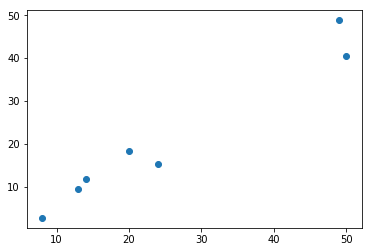

In [26]:
plt.scatter(D[:,0],D[:,1])

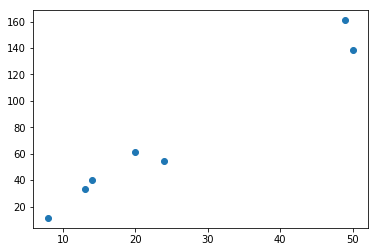

In [35]:
plt.scatter(D[:,0],D[:,2] - 14)

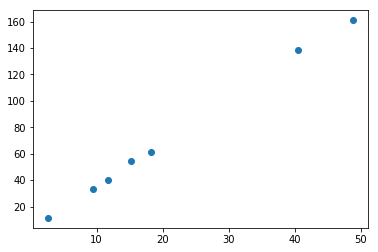

In [32]:
plt.scatter(D[:,1],D[:,2] - 14)

In [58]:
slope, intercept, r_value, p_value, std_err = stats.linregress(D[:,0],(D[:,2] - 14)*0.6666)

In [59]:
slope

2.1432597254776047

In [49]:
orderdf = pd.read_csv('ignored_assets/orders.csv', parse_dates = [6,7])

In [61]:
orderdf['expected_travel_time'] = orderdf['price'] / slope

In [64]:
orderdf['expected_travel_time'].mean()

8.0796159162937098

In [65]:
orderdf.to_csv('ignored_assets/orders.csv', index = False)

(array([  5.58638200e+06,   2.18411400e+06,   4.91171000e+05,
          1.67278000e+05,   5.85850000e+04,   2.27190000e+04,
          1.09880000e+04,   5.74400000e+03,   3.66500000e+03,
          2.69100000e+03,   1.51000000e+03,   1.22700000e+03,
          9.44000000e+02,   5.68000000e+02,   4.37000000e+02,
          3.74000000e+02,   3.53000000e+02,   3.17000000e+02,
          2.14000000e+02,   1.90000000e+02,   1.82000000e+02,
          1.91000000e+02,   2.19000000e+02,   1.54000000e+02,
          9.40000000e+01,   9.30000000e+01,   8.00000000e+01,
          6.30000000e+01,   5.60000000e+01,   5.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

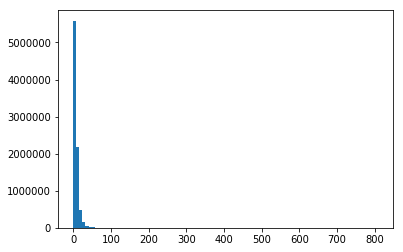

In [66]:
plt.hist(orderdf['expected_travel_time'], bins = 100)